### 분류(Classification)
- 기존 데이터가 어떤 레이블에 속하는지 패턴을 알고리즘으로 인지한 뒤에 새롭게 관측된 데이터에 대한 레이블을 판별하는 것  
** 지도학습 : 레이블(Label), 즉 명시적인 정답이 있는 데이터가 주어진 상태에서 학습하는 머신러닝 방식

- 분류는 다양한 머신러닝 알고리즘으로 구현할 수 있다
 > - 베이즈 통계와 생성 모델에 기반한 **나이브 베이즈(Naive Bayes)**  
 > - 독립변수와 종속변수의 선형 관계성에 기반한 **로지스틱 회귀(Logistic Regression)**  
 > - 데이터 균일도에 따른 규칙 기반의 **결정 트리(Decision Tree)**  
 > - 개별 클래스 간의 최대 분류 마진을 효과적으로 찾아주는 **서포트 벡터 머신(Support Vector Machine)**  
 > - 근접 거리를 기준으로 하는 **최소 근접(Nearest Neighbor) 알고리즘**  
 > - 심층 연결 기반의 **신경망(Neural Network)**  
 > - 서로 다른(또는 같은) 머신러닝 알고리즘을 결합한 **앙상블(Ensemble)**  

### 결정 트리(Decision Tree)

In [10]:
# Graphviz 설치
# http://graphviz.gitlab.io/_pages/Download/Download_windows.html

In [11]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

# DecisionTreeClassifier 생성
dt_clf = DecisionTreeClassifier(random_state = 156)

# 붓꽃 데이터를 로딩하고, 학습과 테스트 데이터 세트로 분리
iris_data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, test_size = 0.2, random_state = 11)

# DecisionTreeClassifier 학습
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=156,
            splitter='best')

In [12]:
from sklearn.tree import export_graphviz

# export_graphviz()의 호출 결과로 out_file로 지정된 tree.dot 파일을 생성함
export_graphviz(dt_clf, out_file = 'tree.dot', class_names = iris_data.target_names, \
               feature_names = iris_data.feature_names, impurity = True, filled = True)

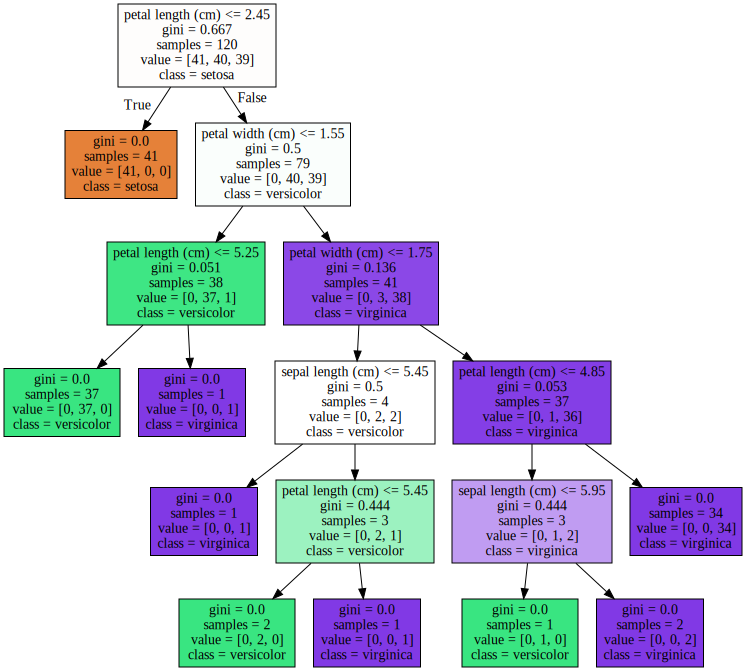

In [13]:
import graphviz

# 위에서 생성된 tree.dot 파일을 Graphviz가 읽어서 주피터 노트북상에서 시각화
with open("tree.dot") as f :
    dot_graph = f.read()

graphviz.Source(dot_graph)

In [14]:
import seaborn as sns
import numpy as np
%matplotlib inline

# feature importance 추출
print("Feature importances : \n{0}".format(np.round(dt_clf.feature_importances_, 3)))

Feature importances : 
[0.025 0.    0.555 0.42 ]


In [15]:
# feature별 importance 매핑
for name, value in zip(iris_data.feature_names, dt_clf.feature_importances_) :
    print('{0} : {1:.3f}'.format(name, value))

sepal length (cm) : 0.025
sepal width (cm) : 0.000
petal length (cm) : 0.555
petal width (cm) : 0.420


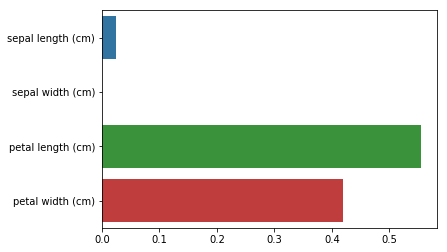

In [16]:
# feature importance를 column별로 시각화
sns.barplot(x=dt_clf.feature_importances_, y=iris_data.feature_names)

In [17]:
# → petal_length가 피처 중요도가 가장 높다는 것을 알 수 있다

### 결정 트리 과적합(Overfitting)

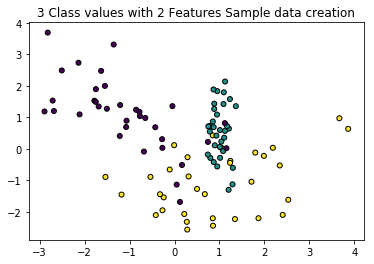

In [19]:
# 결정 트리가 어떻게 학습 데이터를 분할해 예측을 수행하는가
# 이로 인한 과적합 문제도 시각화

# 사이킷런은 분류를 위한 테스트용 데이터를 쉽게 만들 수 있도록
# make_classification() 함수 제공

from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
%matplotlib inline

plt.title("3 Class values with 2 Features Sample data creation")

# 2차원 시각화를 위해서 피처는 2개, 클래스는 3가지 유형의 분류 샘플 데이터 생성
X_features, y_labels = make_classification(n_features=2, n_redundant = 0, n_informative = 2,
                                          n_classes = 3, n_clusters_per_class = 1, random_state = 0)

# 그래프 형태로 2개의 피처로 2차원 좌표 시각화, 각 클래스 값은 다른 색깔로 표시됨
plt.scatter(X_features[:, 0], X_features[:, 1], marker='o', c=y_labels, s = 25, edgecolor = 'k')

In [24]:
import numpy as np

# Classifier의 Decision Boundary를 시각화 하는 함수
def visualize_boundary(model, X, y):
    fig,ax = plt.subplots()
    
    # 학습 데이타 scatter plot으로 나타내기
    ax.scatter(X[:, 0], X[:, 1], c=y, s=25, cmap='rainbow', edgecolor='k',
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim_start , xlim_end = ax.get_xlim()
    ylim_start , ylim_end = ax.get_ylim()
    
    # 호출 파라미터로 들어온 training 데이타로 model 학습 . 
    model.fit(X, y)
    # meshgrid 형태인 모든 좌표값으로 예측 수행. 
    xx, yy = np.meshgrid(np.linspace(xlim_start, xlim_end, num=200),
                         np.linspace(ylim_start,ylim_end, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    # contourf() 를 이용하여 class boundary 를 visualization 수행. 
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap='rainbow', clim=(y.min(), y.max()),
                           zorder=1)

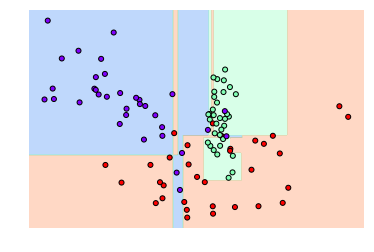

In [25]:
from sklearn.tree import DecisionTreeClassifier

# 결정 트리 생성에 별다른 제약이 없도록
# 하이퍼파라미터가 디폴트인 Classifier을 학습하고
# 결정 기준 경계 시각화

dt_clf = DecisionTreeClassifier().fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

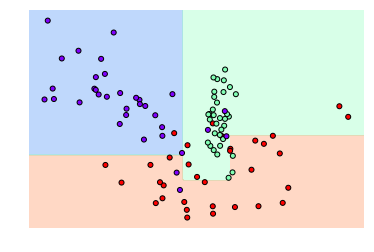

In [26]:
# min_samples_leaf = 6으로 트리 생성 조건을 제약한 결정 경계 시각화
dt_clf = DecisionTreeClassifier(min_samples_leaf=6).fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)